2. Import the libraries you need into a new notebook, including any necessary modules from scikit-learn.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('/content/India_crops_preprocessed_categorized_wtout_outliers.csv')

In [19]:
df.shape

(233801, 12)

3. Clean your data so that it’s ready for analysis. (The data was further cleaned, wrangled and outliers were removed using the Q3 + 1.5*IQR formula in the "Achievement_6_Further_rangling_and_subsetting_data" notebook. Though, another consistency check is run here.)

In [9]:
# Check for missing values

df.isnull().sum() #Only 5 missing crop names

Unnamed: 0             0
State                  0
District               0
Crop                   5
Crop_Year              0
Season                 0
Area                   0
Production             0
Yield                  0
Area_Category          0
Production_Category    0
Yield_Category         0
dtype: int64

In [4]:
# Checking for duplicates 

dups = df[df.duplicated()]

In [5]:
dups.shape # No dups

(0, 12)

4. Explore your data visually (e.g., by way of a scatterplot), looking for variables whose relationship you’d like to test.

In [6]:
data_to_plot = df[['Area','Production','Yield']]

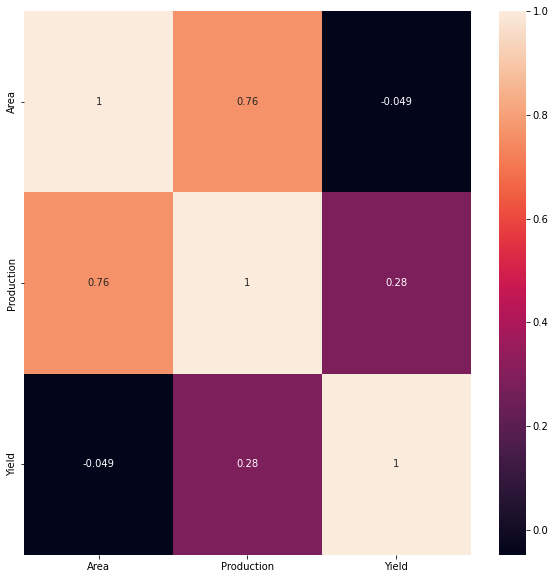

In [7]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(data_to_plot.corr(), annot = True, ax = ax)

**Note:** There is a strong positive correlation between Area and Production. But a weak negative relation between area and yield. Thus, we can rule out our hypothesis that bigger lands will generate bigger yields. 

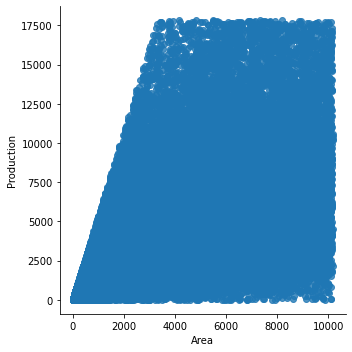

In [8]:
# Create a scatterplot for the "Area" and "Production" columns in seaborn

sns.lmplot(x = 'Area', y = 'Production', data = data_to_plot)

5. State your hypothesis in a markdown cell within your Jupyter notebook.

**Research hypothesis:** Bigger lands generate greater production. If an agricultural land is big, it will produce large amount of crops. 

6. Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.

In [10]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Area'].values.reshape(-1,1)
y = df['Production'].values.reshape(-1,1)

7. Split the data into two sets: a training set and a test set.

In [11]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

8. Run a linear regression on the data.


*   First, fit the model you created to the training set.
*   Then, create a prediction for y on the test set.



In [12]:
# Create a regression object.

regression = LinearRegression() 

In [14]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [15]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

9. Create a plot that shows the regression line on the test set.

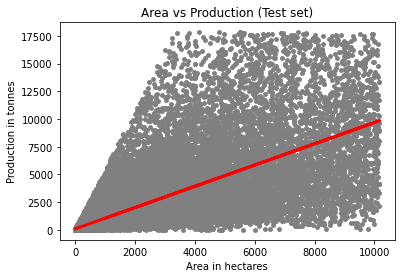

In [16]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Area vs Production (Test set)')
plot_test.xlabel('Area in hectares')
plot_test.ylabel('Production in tonnes')
plot_test.show()

10. Write your own interpretation of how well the line appears to fit the data in a markdown cell.

**Answer:** From the visualization, we can assess that our hypothesis is partially true. While many points fit onto the regression line, there are many points that sit far from the regression line. Which means, while many big lands do generate large productions, there are many lands with large areas that do not generate significant production.

11. Check the model performance statistics—MSE and R2 score.

In [17]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [18]:
# Print the model summary statistics. 

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.95888567]]
Mean squared error:  2618800.216121845
R2 score:  0.583265801596381


That's a large mean squared error!

12. Compare the predicted y values with the actual y values in a dataframe.

In [20]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,515.0,1055.272302
1,264.0,1142.530898
2,40.0,187.480769
3,5272.0,1221.159523
4,1.0,92.551087
5,1510.0,1171.297468
6,300.0,858.700739
7,200.0,187.480769
8,159.0,301.588164
9,3979.0,2364.151244


13. Include your thoughts on how well the model performed on the test set in a markdown cell.


*   Include any reflections you have on the impact of possible data bias.



**Answer:** The R-squared value was greater than 0.50, which means the performance of the model is moderate. Neverthless, the MSE is quite large. In this case, we can assess that our hypothesis is partially true, but cannot be considered true for all lands. 

Whatever, it might also be the case that some or many lands might not be solely dedicated to agriculture, meaning that only a small portion of a big land has been used for agricultural purpose and the rest of the land are used for other purposes, like farming, fishery, nursery, playground or other. While recording the area of the land, area of the whole estate has been recorded instead of the particular area dedicated to sowing and harvesting. 

Apart from land areas, other factors like use of organic and chemical fertilizers and pesticides contribute to crop production. Big lands need more fertilizers, and if not provided enough, will not produce significant amount of crops. Whatever, we don't have the amount of fertilizers used per land in this dataset, so it goes beyond our scope in this project. 

